In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import glob2 as glob
import missingno as msno
import plotly.express as px
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
relative_path = "data/raw/*.csv" 
file_list = glob.glob(relative_path)

dataframes = []


if not file_list:
    print("No CSV files found in the specified path.")
else:
    # Loop through the file list and read each CSV file into a df
    file_list = sorted(file_list)
    for file in file_list:
        try:
            df = pd.read_csv(file)
            dataframes.append(df)
        except Exception as e:
            print(f"Error reading file {file}: {e}")

In [4]:
df_event_results = dataframes[1]
df_country = dataframes[4]
df_games = dataframes[5]
df_results = dataframes[3]
df_athletes = dataframes[0]
df_medals = dataframes[2]

In [5]:
dataframes = {'df_athletes': df_athletes, 
       'df_country': df_country, 
       'df_event_results': df_event_results, 
       'df_games': df_games, 
       'df_medals': df_medals, 
       'df_results': df_results}

In [6]:
def count_na(df):
    def helper(val):
        return val == 'na'
    return df.map(helper).sum() / df.shape[0]

In [7]:
for key, value in dataframes.items():
    print(f'\n\n{key}\n\n')
    print(count_na(value))



df_athletes


athlete_id       0.000000
name             0.000000
sex              0.000000
born             0.027633
height           0.326044
weight           0.326044
country          0.000000
country_noc      0.000000
description      0.669215
special_notes    0.610446
dtype: float64


df_country


country_noc    0.0
country        0.0
dtype: float64


df_event_results


edition        0.000000
edition_id     0.000000
country_noc    0.000000
sport          0.000000
event          0.000000
result_id      0.000000
athlete        0.000000
athlete_id     0.000000
pos            0.000000
medal          0.858463
isTeamSport    0.000000
dtype: float64


df_games


edition             0.0
edition_id          0.0
edition_url         0.0
year                0.0
city                0.0
country_flag_url    0.0
country_noc         0.0
start_date          0.0
end_date            0.0
competition_date    0.0
isHeld              0.0
dtype: float64


df_medals


edition        0.0
edition_id     0

In [8]:
# do we have winter olympics available as much? 
dict(Counter([i[5:] for i in df_games['edition'].unique()]))

{'Summer Olympics': 35,
 'Winter Olympics': 27,
 'Equestrian': 1,
 'Intercalated': 1}

In [9]:
# how many athletes take part by country
df_event_results.groupby(['edition', 'country_noc'], as_index=False)['athlete'].count().head()

,edition,country_noc,athlete
0,1896 Summer Olympics,AUS,7
1,1896 Summer Olympics,AUT,10
2,1896 Summer Olympics,BUL,4
3,1896 Summer Olympics,DEN,25
4,1896 Summer Olympics,FRA,51


In [10]:
# one athlete can take part in several events
df_event_results.groupby(['edition', 'country_noc'])['athlete'].unique().reset_index(name='unique_athletes').assign(athlete_count=lambda x: x['unique_athletes'].apply(len)).head()


,edition,country_noc,unique_athletes,athlete_count
0,1896 Summer Olympics,AUS,"[Teddy Flack, George Stuart Robertson]",2
1,1896 Summer Olympics,AUT,"[Adolf Schmal, Otto Herschmann, Paul Neumann]",3
2,1896 Summer Olympics,BUL,[Charles Champaud],1
3,1896 Summer Olympics,DEN,"[Viggo Jensen, Eugen Schmidt, Holger Nielsen, ...",4
4,1896 Summer Olympics,FRA,"[Adolphe Grisel, Jean Tournois, Louis Adler, A...",18


In [11]:
# are the dates reasonable? 
pd.to_datetime(df_games['year'], format='%Y').dt.year.sort_values(ascending=False)

34    2032
33    2028
61    2026
32    2024
60    2022
31    2020
59    2018
30    2016
58    2014
29    2012
57    2010
28    2008
56    2006
27    2004
55    2002
26    2000
54    1998
25    1996
53    1994
52    1992
24    1992
23    1988
51    1988
22    1984
50    1984
49    1980
21    1980
48    1976
20    1976
47    1972
19    1972
18    1968
46    1968
17    1964
45    1964
44    1960
16    1960
62    1956
15    1956
43    1956
14    1952
42    1952
13    1948
41    1948
40    1944
12    1944
39    1940
11    1940
38    1936
10    1936
9     1932
37    1932
8     1928
36    1928
7     1924
35    1924
6     1920
5     1916
4     1912
3     1908
63    1906
2     1904
1     1900
0     1896
Name: year, dtype: int32

In [12]:
# inconsistencies between competition_date and start_date/end_date 
df_games[['start_date', 'end_date', 'competition_date', 'isHeld']]

,start_date,end_date,competition_date,isHeld
0,6 April,15 April,6 – 13 April,NaN
1,NaN,NaN,14 May – 28 October,NaN
2,14 May,NaN,1 July – 26 November,NaN
3,13 July,NaN,27 April – 31 October,NaN
4,6 July,27 July,5 May – 27 July,NaN
5,NaN,NaN,—,Not held due to war
6,14 August,30 August,23 April – 12 September,NaN
7,5 July,27 July,4 May – 27 July,NaN
8,28 July,12 August,17 May – 12 August,NaN
9,30 July,14 August,30 July – 14 August,NaN


<div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px; text-align: center;">
    <h3 style="margin: 0;">Joining</h3>
</div>

In [13]:
df = pd.merge(df_medals, pd.merge(df_games, df_country, on='country_noc', how='left'), on=['edition_id', 'edition', 'year'], how='left',
        suffixes=('_performing', '_host'))


In [14]:
# drop the one-time events
df = df.drop(df[(df['edition_id'] == 4)|(df['edition_id'] == 48)].index)

In [15]:
count_na(df)

edition                   0.0
edition_id                0.0
year                      0.0
country_performing        0.0
country_noc_performing    0.0
gold                      0.0
silver                    0.0
bronze                    0.0
total                     0.0
edition_url               0.0
city                      0.0
country_flag_url          0.0
country_noc_host          0.0
start_date                0.0
end_date                  0.0
competition_date          0.0
isHeld                    0.0
country_host              0.0
dtype: float64

In [16]:
df.isna().sum()

edition                      0
edition_id                   0
year                         0
country_performing           0
country_noc_performing       0
gold                         0
silver                       0
bronze                       0
total                        0
edition_url                  0
city                         0
country_flag_url             0
country_noc_host             0
start_date                  19
end_date                    46
competition_date             0
isHeld                    1782
country_host                 0
dtype: int64

In [17]:
df_comparison = df.groupby(['country_host', 'edition', 'year', 'country_performing'], as_index=False)['total'].sum() \
    .groupby('edition', group_keys=False) \
    .apply(lambda x: x.nlargest(8,'total'))

In [18]:
df_comparison['season'] = [1 if 'Winter' in edition else 0 for edition in df_comparison['edition']]

In [19]:
import kaleido
import plotly.io as pio
pio.renderers.default = "svg"

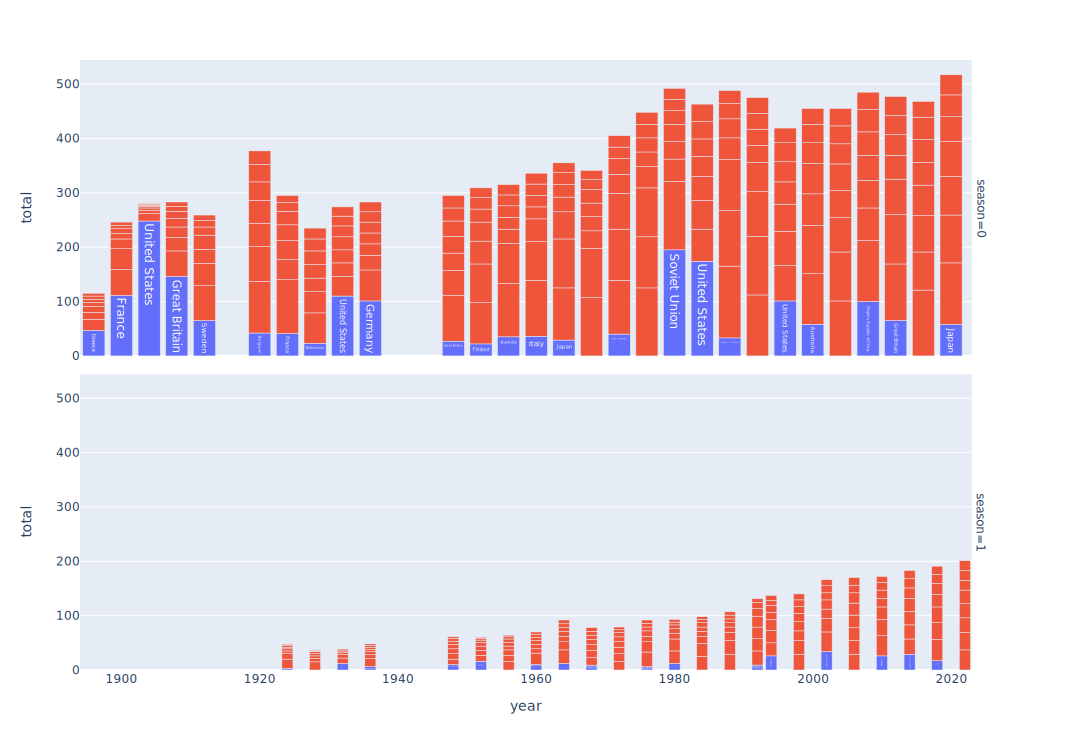

In [20]:
# does it look like being host country gives a medal advantage?
fig = px.bar(df_comparison, x='year', y='total',
             hover_data=['country_performing', 'country_host'],
             facet_row='season',
             text=df_comparison.apply(lambda row: row['country_host'] if row['country_host'] == row['country_performing'] else None, axis=1),
             color=df_comparison.apply(lambda row: 'red' if row['country_host'] == row['country_performing'] else 'black', axis=1))
fig.update_layout(showlegend=False, height=750, width=1070)

fig.show()